# Test disk relaxation: beta cooling towards a different scale height

In [1]:
from util import *

In [2]:
folder = "../try_disk/"
from MeshGen import GetMeshGen
MeshGen = GetMeshGen(nth_lo=16, nth_hi=64, dth_pole=0.1, h_hi=0.5, reflect=True)

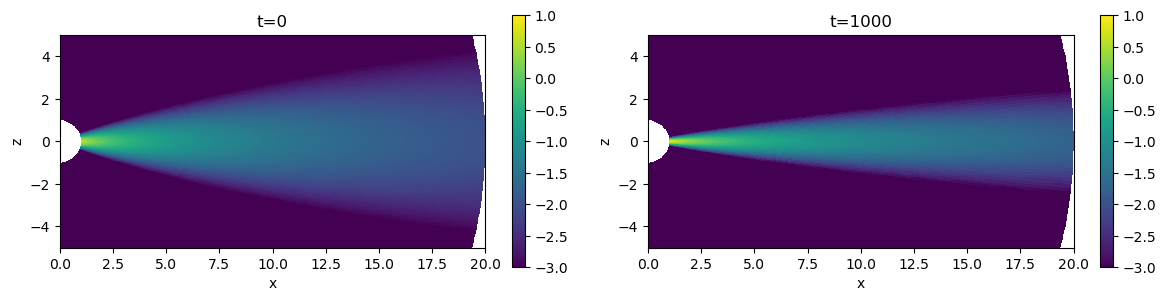

In [3]:
fig, ax = plt.subplots(1,2,figsize=(12,3))
d = athdf(folder+"disk.out1.00000.athdf", face_func_2=MeshGen)
plt.sca(ax[0])
d.plot_snapshot_2d(np.log10(d['rho'][0]),mode='xz',vmax=1,vmin=-3)
plt.ylim([-5,5])
plt.title('t=0')
d = athdf(folder+"disk.out1.00100.athdf", face_func_2=MeshGen)
plt.sca(ax[1])
d.plot_snapshot_2d(np.log10(d['rho'][0]),mode='xz',vmax=1,vmin=-3)
plt.ylim([-5,5])
plt.title('t=1000')
plt.tight_layout()

# How long does it take to relax?

Text(0.5, 1.0, 'vertical profile at r=10, t=0,100,200...\nconvergence took ~300~10/Omega')

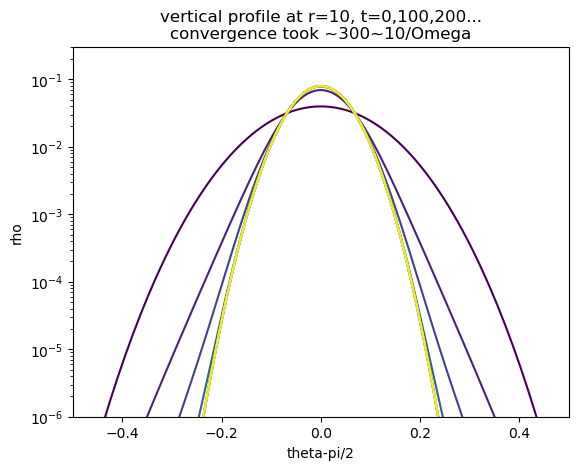

In [4]:
r = 10
colors = plt.get_cmap('viridis')(np.linspace(0,1,11))
ic = 0
for i in range(0,101,10):
    d = athdf(folder+"disk.out1.{}.athdf".format(str(i).zfill(5)), face_func_2=MeshGen)
    ir = np.argmin(np.abs(d.r-r))
    plt.plot(list(d.th-np.pi/2)+list((-d.th+np.pi/2)[::-1]), list(d['rho'][0,:,ir])+list(d['rho'][0,::-1,ir]),color=colors[ic])
    ic += 1
plt.xlim(-0.5,0.5)
plt.yscale('log')
plt.ylim(1e-6,0.3)
plt.xlabel('theta-pi/2')
plt.ylabel('rho')
plt.title('vertical profile at r=10, t=0,100,200...\nconvergence took ~300~10/Omega')

# Has surface density changed by much?

Text(0.5, 1.0, '~10% change at boundary, ~1% change otherwise; not too bad')

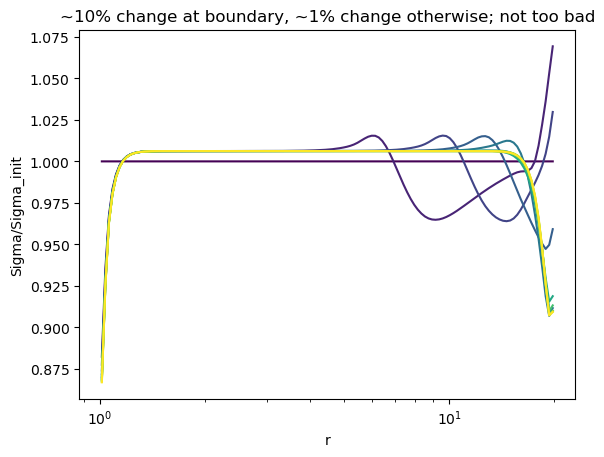

In [5]:
colors = plt.get_cmap('viridis')(np.linspace(0,1,11))
ic = 0
for i in range(0,101,10):
    d = athdf(folder+"disk.out1.{}.athdf".format(str(i).zfill(5)), face_func_2=MeshGen)
    Sigma = d.int_column(d['rho'])
    Sigma_init = 1/d.r
    plt.plot(d.r, Sigma[0]/Sigma_init, color=colors[ic])
    ic+=1
plt.xscale('log')
plt.xlabel('r')
plt.ylabel('Sigma/Sigma_init')
plt.title('~10% change at boundary, ~1% change otherwise; not too bad')